In [17]:
import pandas as pd
import tensorflow as tf
import numpy as np
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Dense, Input, Dropout, Activation, Conv1D,Flatten
from keras.layers import MaxPooling1D,GlobalMaxPool1D
from keras.models import Sequential,Model
import matplotlib.pyplot as plt
import seaborn as sns




In [18]:
df = pd.read_csv("BankChurners.csv")
df.shape

(10127, 23)

In [19]:
df.Attrition_Flag = df.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
df.Gender = df.Gender.replace({'F':1,'M':0})
df = pd.concat([df,pd.get_dummies(df['Education_Level']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Income_Category']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Marital_Status']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Card_Category']).drop(columns=['Platinum'])],axis=1)
df.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)
df

/tmp/ipykernel_908/1309298447.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Attrition_Flag = df.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
/tmp/ipykernel_908/1309298447.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Gender = df.Gender.replace({'F':1,'M':0})


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,False,True,False,False,False,True,False,True,False,False
1,0,49,1,5,44,6,1,2,8256.0,864,...,False,False,False,True,False,False,True,True,False,False
2,0,51,0,3,36,4,1,0,3418.0,0,...,False,False,True,False,False,True,False,True,False,False
3,0,40,1,4,34,3,4,1,3313.0,2517,...,False,False,False,True,False,False,False,True,False,False
4,0,40,0,3,21,5,1,0,4716.0,0,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,40,3,2,3,4003.0,1851,...,True,False,False,False,False,False,True,True,False,False
10123,1,41,0,2,25,4,2,3,4277.0,2186,...,True,False,False,False,True,False,False,True,False,False
10124,1,44,1,1,36,5,3,4,5409.0,0,...,False,False,False,True,False,True,False,True,False,False
10125,1,30,0,2,36,4,3,3,5281.0,0,...,True,False,False,False,False,False,False,True,False,False


In [20]:
Encoder = "Label Encoder"
# OverSamplingTecnique = ""
OverSamplingTecnique = "SMOTE-Enn"
#OverSamplingTecnique = "SMOTE-Tomek"
#OverSamplingTecnique = "SMOTE"

In [21]:
if Encoder == "Label Encoder":
  print("Applying Label Encoder")
  df_final = df.copy()
  le = LabelEncoder()
  text_data_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                     'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                     'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                     'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

  print('Label Encoder Transformation')
  for i in text_data_features :
      df_final[i] = le.fit_transform(df_final[i])
      print(i,' : ',df_final[i].unique(),' = ',le.inverse_transform(df_final[i].unique()))


X = df_final.drop(['Attrition_Flag'], axis=1).copy()
Y = df_final['Attrition_Flag'].copy().astype(int)

Applying Label Encoder
Label Encoder Transformation
Customer_Age  :  [19 23 25 14 18  6 11 22 16 39 30  9 31 15 35 21 36 28 33 37 27 32 29 40
 24 12 20 26 13 17 38 42 41 34 44 43 10  8  7  0  5  3  4  2  1]  =  [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Dependent_count  :  [3 5 4 2 0 1]  =  [3 5 4 2 0 1]
Months_on_book  :  [26 31 23 21  8 33 14 18 41 17 35 24 43 29 36 20 15 25 28 30 32 39 27 37
 22 34 19  7 16 12 40 11 42 10  9 13  0 38  6  2  4  5  3  1]  =  [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Total_Relationship_Count  :  [4 5 3 2 1 0]  =  [5 6 4 3 2 1]
Months_Inactive_12_mon  :  [1 4 2 3 6 0 5]  =  [1 4 2 3 6 0 5]
Contacts_Count_12_mon  :  [3 2 0 1 4 5 6]  =  [3 2 0 1 4 5 6]
Credit_Limit  :  [4623 3623 1623 ... 2671 2615 4184]  =  [12691.  8256.  3418. ...  5409.  5281. 10388.]
Total_Revolving

In [22]:
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X)
X=X_resampled_scaled
Y=Y

/tmp/ipykernel_908/2425986076.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition_Flag', data=df_final, palette=colors, ax=ax)
/tmp/ipykernel_908/2425986076.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Retained', 'Churned'], fontweight='bold')


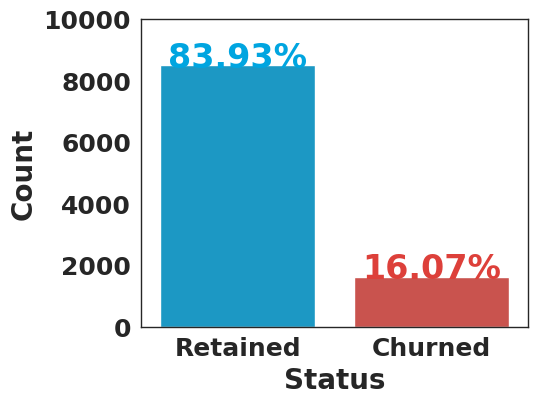

In [23]:

sns.set_style('white')

font_size = 20
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2

colors = ['#00A5E0', '#DD403A']

fig, ax = plt.subplots(figsize=(5, 4))

sns.countplot(x='Attrition_Flag', data=df_final, palette=colors, ax=ax)

for index, value in enumerate(df_final['Attrition_Flag'].value_counts()):
    label = '{}%'.format(round((value / df_final['Attrition_Flag'].shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center',
                color=colors[index], weight='bold',
                size=font_size + 4)

ax.set_xticklabels(['Retained', 'Churned'], fontweight='bold')
ax.set_xlabel('Status', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_ylim([0, 10000]);

In [24]:
if OverSamplingTecnique == "SMOTE":
  print("Applying SMOTE")
  smote = SMOTE()

  X_resampled, y_resampled = smote.fit_resample(X, Y)
  scaler = StandardScaler()
  X_resampled_scaled = scaler.fit_transform(X_resampled)
  X=X_resampled_scaled
  Y=y_resampled

In [25]:
if OverSamplingTecnique == "SMOTE-Tomek":
  print("Applying SMOTE-Tomek")

  smote_tomek = SMOTETomek()
  X_resampled, y_resampled = smote_tomek.fit_resample(X, Y)
  scaler = StandardScaler()
  X_resampled_scaled = scaler.fit_transform(X_resampled)
  X=X_resampled_scaled
  Y=y_resampled

In [26]:
if OverSamplingTecnique == "SMOTE-Enn":
  print("Applying SMOTE-Enn")

  smote_enn = SMOTEENN()
  X_resampled, y_resampled = smote_enn.fit_resample(X, Y)
  scaler = StandardScaler()
  X_resampled_scaled = scaler.fit_transform(X_resampled)
  X=X_resampled_scaled
  Y=y_resampled

Applying SMOTE-Enn


/tmp/ipykernel_908/901813396.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition_Flag', data=X_resampled_scaled_df, palette=colors, ax=ax)
/tmp/ipykernel_908/901813396.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Retained', 'Churned'], fontweight='bold')


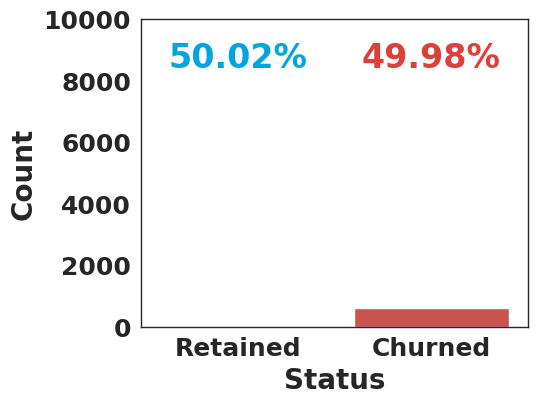

In [27]:
sns.set_style('white')

font_size = 20
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2

colors = ['#00A5E0', '#DD403A']

fig, ax = plt.subplots(figsize=(5, 4))

X_resampled_scaled_df = pd.DataFrame(X_resampled_scaled)
X_resampled_scaled_df['Attrition_Flag'] = y_resampled

sns.countplot(x='Attrition_Flag', data=X_resampled_scaled_df, palette=colors, ax=ax)

for index, value in enumerate(y_resampled.value_counts()):
    label = '{}%'.format(round((value / y_resampled.shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center',
                color=colors[index], weight='bold',
                size=font_size + 4)

ax.set_xticklabels(['Retained', 'Churned'], fontweight='bold')
ax.set_xlabel('Status', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_ylim([0, 10000]);

In [28]:
def feature_extractor_from_dl_model(model, data_seq, layer_num):
    """
    Create a new representation of the data by extracting the output of the given DL layer_num
    Parameters
    ----------
    @param model: DL model
    @param data_seq: DNA sequences for extracting DL representation
    @param layer_num: the output of this layer is used as feature representation
    """
    # Get the input tensor of the model
    input_tensor = model.layers[0].input
    # Create a new model that only includes the desired layer
    new_model = tf.keras.models.Model(inputs=input_tensor, outputs=model.layers[layer_num].output)
    layer_outs = new_model.predict(data_seq)
    out_array = np.array(layer_outs)
    out_array = out_array.flatten()
    out_array = np.reshape(out_array, (data_seq.shape[0], -1))
    return out_array

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D,Flatten,Concatenate
from sklearn.ensemble import RandomForestClassifier
random_state = 42
def kfold(Model_No):
  print("Applying K-fold")


  # Assuming X and Y are your input and target data
  # Define the number of folds
  num_folds = 2

  # Initialize lists to store the evaluation results
  accuracy_scores = []
  precision_scores = []
  recall_scores = []
  f1_scores = []

  # Perform stratified k-fold cross-validation
  fold_number = 1  # Initialize the fold number
  skf = StratifiedKFold(n_splits=num_folds, shuffle=True)
  for train_index, test_index in skf.split(X, Y):
      print(f"Fold {fold_number}/{num_folds}:")
      # Split the data into training and test sets for the current fold
      X_train, X_test = X[train_index], X[test_index]
      # X_train, X_test = X[train_index], X[test_index]
      Y_train, Y_test = Y[train_index], Y[test_index]
      
      if Model_No==1:
        model=Sequential()
        model.add(Input(shape=(X_train.shape[1], 1)))
        model.add(Conv1D(filters=128,kernel_size=3,padding='same',activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=64,kernel_size=3,padding='same',activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=32,kernel_size=3,padding='same',activation='relu'))
        model.add(GlobalMaxPool1D())
        model.add(Dense(64, activation='tanh'))
        model.add(Dense(32, activation='tanh'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # Compile and train the model
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1,validation_split=0.2)
      elif Model_No==2:
        model=Sequential()
        model.add(Input(shape=(X_train.shape[1], 1)))
        model.add(Conv1D(filters=128,kernel_size=3,padding='same',activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=64,kernel_size=3,padding='same',activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=32,kernel_size=3,padding='same',activation='relu'))
        model.add(GlobalMaxPool1D())
        model.add(Dense(64, activation='tanh'))
        model.add(Dense(32, activation='tanh'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # Compile and train the model
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
        model.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, Y_train, epochs=3, batch_size=32, verbose=1,validation_split=0.2)
        out_array=feature_extractor_from_dl_model(model, X_train, -6)
        model2 = RandomForestClassifier(random_state=random_state)
        model2.fit(out_array, Y_train)
        out_array=feature_extractor_from_dl_model(model, X_test, -6)
        X_test=out_array
        model=model2
      elif Model_No==3:
        model=Sequential()
        model.add(Input(shape=(X_train.shape[1], 1)))
        model.add(LSTM(128, return_sequences=True))
        model.add(LSTM(16))

     # Compile and train the model
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        history=model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1,validation_split=0.2)
      Y_pred = model.predict(X_test)
      Y_pred_binary = np.round(Y_pred).flatten()

      # Calculate evaluation metrics
      accuracy = accuracy_score(Y_test, Y_pred_binary)
      precision = precision_score(Y_test, Y_pred_binary)
      recall = recall_score(Y_test, Y_pred_binary)
      f1 = f1_score(Y_test, Y_pred_binary)

      print(' Test--------- | accuracy:{:<6.4f} | precision:{:<6.4f} |recall:{:<6.4f} | F1:{:<6.4f}'.format( accuracy, precision, recall, f1))
      # Append the scores to the respective lists
      accuracy_scores.append(accuracy)
      precision_scores.append(precision)
      recall_scores.append(recall)
      f1_scores.append(f1)
      fold_number += 1


  # Calculate the average scores
  avg_accuracy = np.mean(accuracy_scores)
  avg_precision = np.mean(precision_scores)
  avg_recall = np.mean(recall_scores)
  avg_f1 = np.mean(f1_scores)

  # Print the average scores
  print(avg_accuracy)
  print(avg_precision)
  print(avg_recall)
  print(avg_f1)
  

In [30]:
kfold(2)

Applying K-fold
Fold 1/2:
Epoch 1/3
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4900 - loss: 0.6935 - val_accuracy: 0.0000e+00 - val_loss: 0.7847
Epoch 2/3
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6293 - loss: 0.6624 - val_accuracy: 0.0000e+00 - val_loss: 0.8532
Epoch 3/3
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6220 - loss: 0.6480 - val_accuracy: 0.0000e+00 - val_loss: 0.8825
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
 Test--------- | accuracy:0.9865 | precision:0.9907 |recall:0.9821 | F1:0.9864
Fold 2/2:
Epoch 1/3
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4562 - loss: 0.7014 - val_accuracy: 0.0000e+00 - val_loss: 0.7656
Epoch 2/3
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6291 - loss: 0.6676 - val_accuracy: 0.0000e+00 - val_loss: 0.8485
Epoch 3/3
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6167 - loss: 0.6566 - val_accuracy: 0.0000e+00 - val_loss: 0.8746
266/266 ━━━━━━━━━